In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.datasets.samples_generator import make_blobs

In [ ]:
# 2.ii/iii

In [2]:
def getCities(D):
    n = len(D)  # Number of cities
    locs = initializeLocs(n,D)    # List which will contain 9 2D arrays, each representing a city's lat and long
    cities = ["BOS","NYC","DC","MIA","CHI","SEA","SF","LA","DEN"]
    plotCities(locs,cities,save=False)
    locs = optimizeLocs(locs,D)
    plotCities(locs,cities,save=True)
    getDisc2(locs,D)
    return locs

In [3]:
def initializeLocs(n,D):
    locs = []
    a = -1*max(D[0])
    b = max(D[0])
    for i in range(n):
        locs.append(np.array([random.uniform(a, b),random.uniform(a, b)]))
    return locs

In [5]:
def optimizeLocs(locs,D):
    n = len(locs)
    grad = np.array([1]*n)
    cities = ["BOS","NYC","DC","MIA","CHI","SEA","SF","LA","DEN"]

#     x=1.1
    plotCities(locs,cities,save=False)
    while getDisc(locs,D) > 100000:
        grad = getGrad(locs,D)
#         print(locs,"\n",grad)
        before = getDisc(locs,D)
        for i in range(n):
#             print(locs[i],grad[i])
            locs[i] -= grad[i]/100      # (300*x)
#             print(locs[i],grad[i])
        after = getDisc(locs,D)
#         print(f"before-after: {before-after}")
        if before-after < 0:
            print("SOMETHING IS WRONG!")
            locs[i] += grad[i]/100 # Revert step that was too large?
            print("getDisc(locs,D) = ",getDisc(locs,D))
            print("np.linalg.norm(grad) = ",np.linalg.norm(grad))
            break
            
    plotCities(locs,cities,save=False)
    while getDisc(locs,D) > 10000:
        grad = getGrad(locs,D)
#         print(locs,"\n",grad)
        before = getDisc(locs,D)
        for i in range(n):
#             print(locs[i],grad[i])
            locs[i] -= grad[i]/1000      # (300*x)
#             print(locs[i],grad[i])
        after = getDisc(locs,D)
#         print(f"before-after: {before-after}")
        if before-after < 0:
            print("SOMETHING IS WRONG!")
            locs[i] += grad[i]/1000 # Revert step that was too large?
            print("getDisc(locs,D) = ",getDisc(locs,D))
            print("np.linalg.norm(grad) = ",np.linalg.norm(grad))
            break
    
    plotCities(locs,cities,save=False)
    while getDisc(locs,D) > 1000:
        grad = getGrad(locs,D)
#         print(locs,"\n",grad)
        before = getDisc(locs,D)
        for i in range(n):
#             print(locs[i],grad[i])
            locs[i] -= grad[i]/100000      # (300*x)
#             print(locs[i],grad[i])
        after = getDisc(locs,D)
#         print(f"before-after: {before-after}")
        if before-after < 0:
            print("SOMETHING IS WRONG!")
            locs[i] += grad[i]/100000 # Revert step that was too large?
            print("getDisc(locs,D) = ",getDisc(locs,D))
            print("np.linalg.norm(grad) = ",np.linalg.norm(grad))
            break
            
    plotCities(locs,cities,save=False)
    return locs

In [6]:
def getGrad(locs,D):
    n = len(locs)
    grad = []
    for k in range(n):
        deriv = np.array([np.float64(0.0),np.float64(0.0)])
        for j in range(n):
            if k == j:
                deriv+= np.array([np.float64(0.0),np.float64(0.0)])
#                 print(deriv)
            elif k != j:
#                 print(deriv,getDeriv(locs,D,k,j))
                deriv += getDeriv(locs,D,k,j)
        deriv *= 4
        grad.append(deriv)
    return grad

In [7]:
def getDeriv(locs,D,k,j):
    scalar = 4*(np.linalg.norm(locs[k]-locs[j])-D[k][j]) # np.float64()
    diff = (locs[k]-locs[j])/np.linalg.norm(locs[k]-locs[j])
    Xs = []
    for x in diff:
        x *= scalar
        Xs.append(x)
    return Xs

In [8]:
def plotCities(locs,cities,save):
    n = len(locs)
    for i in range(n):
        plt.plot(locs[i][0],locs[i][1],"bo",markersize=3)
        plt.text(locs[i][0], locs[i][1],cities[i], color="black")
    if save:
        num = input("What number city plot is this? (1, 2, or 3)")
        title = "Cities Plot "+str(num)
        plt.title(title)
        plt.savefig('Downloads/MLHW4_plots/Q2iii/'+title+".png")
    plt.show()

In [9]:
def getDisc(locs,D):
    disc = 0
    n = len(locs)
    for i in range(n):
        for j in range(n):
            disc += (np.linalg.norm(locs[i]-locs[j]) - D[i][j])**2
    return disc

In [10]:
def getDisc2(locs,D):
    disc = 0
    n = len(locs)
    for i in range(n):
        for j in range(n):
            disc += (np.linalg.norm(locs[i]-locs[j]) - D[i][j])**2
    print(f"Final discrepancy: {disc}")
    
    D2 = []
    for i in range(n):
        D2.append([])
        for j in range(n):
            D2[i].append(np.linalg.norm(locs[i]-locs[j]) - D[i][j])
    print(f"D2: {D2}")
    return disc

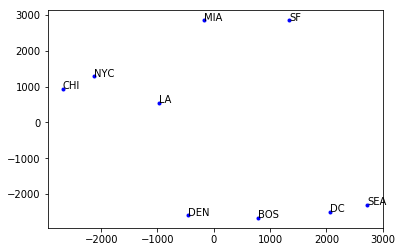

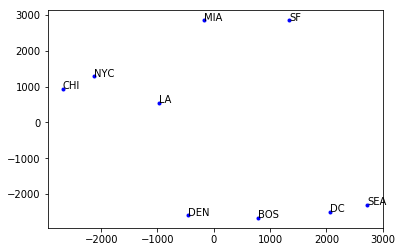

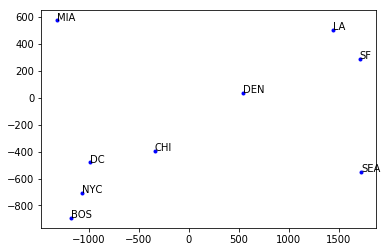

SOMETHING IS WRONG!
getDisc(locs,D) =  56374.08800261751
np.linalg.norm(grad) =  0.001060618366256796


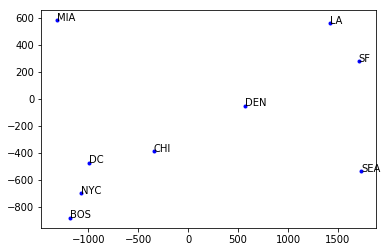

SOMETHING IS WRONG!
getDisc(locs,D) =  56374.08800261746
np.linalg.norm(grad) =  0.00105832256721094


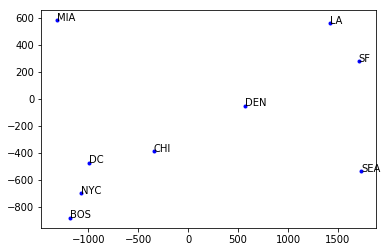

What number city plot is this? (1, 2, or 3)4


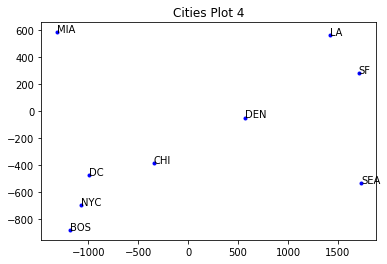

Final discrepancy: 56374.08800261746
D2: [[0.0, 7.832414118623575, 22.013116578269546, -32.67229854152856, 12.130741589928789, -39.18526881223579, 20.955505682471085, 2.2974776007786204, -10.431548636398247], [7.832414118623575, 0.0, 6.483040476239637, -2.1855291662309355, -9.096588611032985, -5.51160588679295, 13.140300447580557, 11.34326642992528, -7.721370457529474], [22.013116578269546, 6.483040476239637, 0.0, 31.39946932459111, -17.67294425150817, 39.89782343271327, 2.573418740249963, -2.735050544630667, -1.56621110418223], [-32.67229854152856, -2.1855291662309355, 31.39946932459111, 0.0, 44.83321816983789, -26.853818675739603, -15.756809519816215, 52.7809442856601, -52.20132527081569], [12.130741589928789, -9.096588611032985, -17.67294425150817, 44.83321816983789, 0.0, 67.8879636657066, 14.542156732625699, -47.337476136274745, -25.13240903663916], [-39.18526881223579, -5.51160588679295, 39.89782343271327, -26.853818675739603, 67.8879636657066, 0.0, 7.926437694750575, 7.7993228798

[array([-1184.78002302,  -883.31966552]),
 array([-1073.10212604,  -700.96740023]),
 array([-991.54049955, -475.80117772]),
 array([-1315.11984254,   582.22348858]),
 array([-343.93983385, -389.48999906]),
 array([1731.64952899, -537.89321391]),
 array([1706.81403019,  277.65515972]),
 array([1424.56028461,  558.71979612]),
 array([565.98261382, -50.92683154])]

In [46]:
D=[[0,206, 429, 1504, 963, 2976, 3095, 2979, 1949],[206, 0, 233, 1308, 802, 2815, 2934, 2786, 1771],[429, 233, 0,\
    1075, 671, 2684, 2799, 2631, 1616],[1504, 1308, 1075, 0, 1329, 3273, 3053, 2687, 2037],[963,802, 671, 1329, 0,\
    2013, 2142, 2054, 996],[2976, 2815, 2684, 3273, 2013, 0, 808, 1131, 1307],[3095, 2934, 2799, 3053, 2142, 808, 0,\
    379, 1235],[2979, 2786, 2631, 2687, 2054, 1131, 379, 0, 1059],[1949, 1771, 1616, 2037, 996, 1307, 1235, 1059, 0]]
getCities(D)

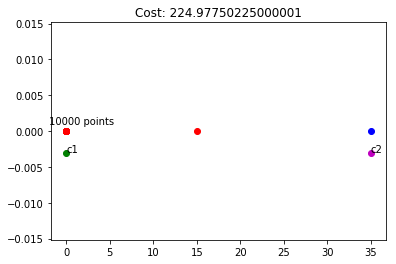

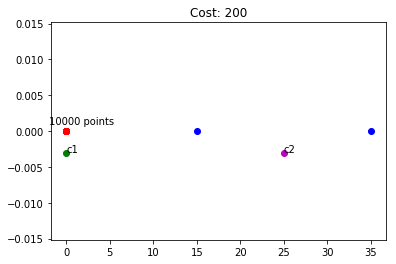

In [72]:
#4bii

n = 10000
x = [0]*n
y = [0]*n
plt.scatter(x,y,c=["r"])
plt.text(-2,0.001,"10000 points",color="black")
plt.plot(15/n,-.003,"go")
plt.text(15/n,-.003,"c1",color="black")
plt.plot(15,0,"ro")
plt.plot(35,0,"bo")
plt.plot(35,-.003,"mo")
plt.text(35,-.003,"c2",color="black")
cost = n*(15/n)**2 + (15-15/n)**2 + 0
title = f"Cost: {cost}"
plt.title(title)
plt.savefig('Downloads/MLHW4_plots/Q4bii/Worse.png')
plt.show()

plt.scatter(x,y,c=["r"])
plt.text(-2,0.001,"10000 points",color="black")
plt.plot(0,-.003,"go")
plt.text(0,-.003,"c1",color="black")
plt.plot(15,0,"bo")
plt.plot(35,0,"bo")
plt.plot(25,-.003,"mo")
plt.text(25,-.003,"c2",color="black")
cost = 0 + 10**2 + 10**2
title = f"Cost: {cost}"
plt.title(title)
plt.savefig('Downloads/MLHW4_plots/Q4bii/Better.png')
plt.show()

In [11]:
colors = "bgrcmykbgrcmykbgrcmykbgrcmykbgrcmykbgrcmykbgrcmykbgrcmyk"
colors2 = "rkbgrcmykbgrcmykbgrcmykbgrcmykbgrcmykbgrcmykbgrcmyk"

In [12]:
def LloydMethod(k,X):    # k is a natural number, X is an array of vectors (arrays) in R2
    C = initializeCenters(k,X)   # An array of vectors (arrays) in R2
    Cold = 0    # Just something to be unequal to C in the first iteration. C old, not cold like winter
    while not (np.array_equal(C,Cold)):
        part = getPart(C,X,k)
        Cold=C
        C = getC(part)
    plot(C,part,colors)
    return part,C

In [13]:
def initializeCenters(k,X): # Choose k random elements in X and make them the centers
    C = np.array(random.sample(list(X),k))
    return C

In [14]:
def getPart(C,X,k):   # Assign every data point to its nearest center
    part = {}    # Stores partition
    for i in range(k):
        part[i]=[]     # key:value --> center number : data points assigned to center
    
    for x in X:
        c = getNearestCenter(x,C)
        for i in range(len(C)):
            if np.array_equal(c,C[i]):
                part[i].append(x)
                break
    
    return part

In [15]:
def getNearestCenter(x,C):
    minDist = 10**100
    for c in C:
        dist = getL2Dist(x,c)
        if dist < minDist:
            minDist = dist
            closestC = c
    return closestC

In [16]:
def getL2Dist(x,c):
    x = np.array(x)
    c = np.array(c)
    dist = np.linalg.norm(x-c)
    return dist

In [17]:
def getC(part):    # For each grouping of points, reevaluate the location of the center by taking the mean of the points
    C = []    
    for key in part:
        c = getMean(part[key])
# I don't think I ever have to worry about a center with no points assigned, because each is initialized as a data point
        C.append(c)
    return C

In [18]:
def getMean(V):   # V is a list of vectors, such as those assigned to a certain center
    V = np.array(V)
    mean = V.mean(axis=0)
    return mean

In [19]:
def plot(C,part,colors):   # Plot centers and data, with groupings color coded
    for i in part:   # The keys in part are also the numbers 0,...,k-1
        for x in part[i]:
            plt.plot(x[0],x[1],colors[i]+"x",markersize=5)
        
        plt.plot(C[i][0],C[i][1],colors2[i]+"o",label=f"c{i}",markersize=10)
        print(f"c{i}: ({C[i][0]},{C[i][1]})")
    plt.gca().set_aspect('equal', adjustable='box')
#     plt.legend(loc='upper left')
    plt.xlabel("x")
    plt.ylabel("y")
    savefig = input("Do you want to save the plot for this run?\n")
    if savefig in "Yesyes":
        k = input("How many clusters? (What is k?)\n")
        clusterType = input("What type of object is each cluster? (Circle, quadratic, blob, etc.)\n")
        title = k +" "+ clusterType + "s"
        plt.title(title)
        plt.savefig('Downloads/MLHW4_plots/Q4bii/'+title+".png")
    plt.show()

In [20]:
def getCircle(n,r):   # n = points in circle, r = radius of circle
    X = []
    for theta in np.arange(0,2*np.pi,2*np.pi/n):
        # using trig to get the x and y coordinates on the ring
        xCoord = r * np.cos(theta)
        yCoord = r * np.sin(theta)
        
        # query the interpolated data
        X.append(np.array([xCoord, yCoord]))
    return X  # Has to be a list so that you can just concatenate datasets by addition

In [21]:
def getQuadratic(n,a,b,c):   # n = points in circle, r = radius of circle
    X = []
    for x in np.arange(-10*a,10*a,20*a/n):
        # using trig to get the x and y coordinates on the ring
        xCoord = x
        yCoord = a*x**2 + b*x + c
        
        # query the interpolated data
        X.append(np.array([xCoord, yCoord]))
    return X  # Has to be a list so that you can just concatenate datasets by addition

In [22]:
def getExp(n,a,b,c):   # n = points in circle, r = radius of circle
    X = []
    for x in np.arange(-a,5*a,6*a/n):
        # using trig to get the x and y coordinates on the ring
        xCoord = x
        yCoord = a*np.exp(b*x) + c
        
        # query the interpolated data
        X.append(np.array([xCoord, yCoord]))
    return X  # Has to be a list so that you can just concatenate datasets by addition

In [23]:
def getGaussian(n,mu,sigma):
    a = 1/(sigma*(2*np.pi)**(1/2))
    X = []
    for x in np.arange(mu-3*sigma,mu+3*sigma,6*sigma/n):
        # using trig to get the x and y coordinates on the ring
        xCoord = x
        yCoord = a*np.exp(-1/2 * ((x-mu)/sigma)**2)
        
        # query the interpolated data
        X.append(np.array([xCoord, yCoord]))
    return X

c0: (-0.6474367717331154,4.087754898186273)
c1: (0.6474367717331156,-4.087754898186273)
Do you want to save the plot for this run?y
How many clusters? (What is k?)2
What type of object is each cluster? (Circle, quadratic, blob, etc.)Circle


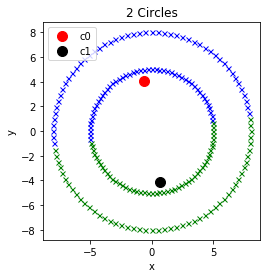

In [134]:
X = getCircle(100,5) + getCircle(100,8)
part,C=LloydMethod(2,X)

c0: (-3.469817026295156e-14,-1.4466666666667196)
c1: (-3.432424947943476e-14,29.59653543307068)
c2: (-0.3614457831325644,76.78843373493929)
Do you want to save the plot for this run?
n


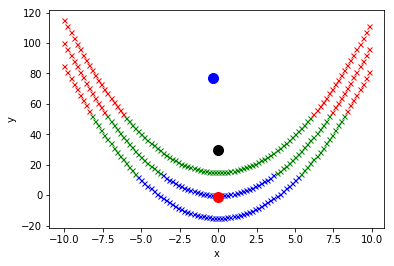

In [143]:
X = getQuadratic(100,1,0,0) + getQuadratic(100,1,0,15) + getQuadratic(100,1,0,-15)
part,C=LloydMethod(3,X)

c0: (1.258255033557049,-7.656587587863872)
c1: (4.496923076923082,148.50526835601443)
c2: (2.2928000000000024,38.96368480051157)
Do you want to save the plot for this run?
y
How many clusters? (What is k?)
3
What type of object is each cluster? (Circle, quadratic, blob, etc.)
Exponential


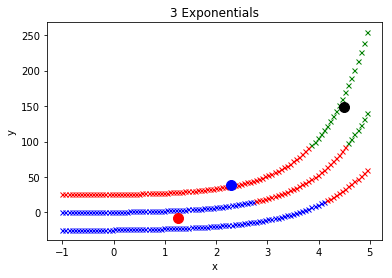

In [144]:
X = getExp(100,1,1,0) + getExp(100,1,1.1,25) + getExp(100,1,0.9,-25)
part,C=LloydMethod(3,X)

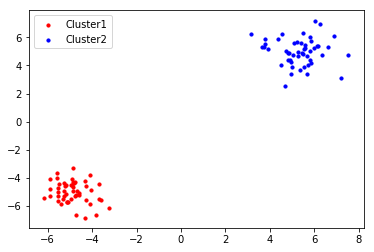

c0: (-4.889839604898791,-5.0132278317800925)
c1: (5.315610395668676,4.98997915957172)


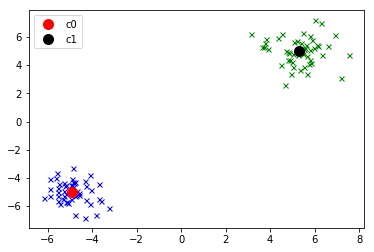

In [93]:
centers = [(-5, -5), (5, 5)]
cluster_std = [0.8, 1]

X, y = make_blobs(n_samples=100, cluster_std=cluster_std, centers=centers, n_features=2, random_state=1)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color="red", s=10, label="Cluster1")
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="blue", s=10, label="Cluster2")
plt.legend()
plt.show()

part,C=LloydMethod(2,X)

c0: (-1.890880890661279,1.0306859782007853)
c1: (3.0159686742743035,-6.010968434229039)
c2: (-4.939747982836315,-4.979117195046834)
c3: (4.960911286284784,5.043013017822231)
c4: (10.98147393691682,6.02991229334148)


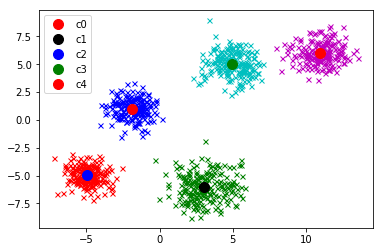

In [103]:
centers = [(-5, -5), (5, 5),(11,6),(-2,1),(3,-6)]
cluster_std = [0.8, 1,1,0.8,1.2]

X, y = make_blobs(n_samples=1000, cluster_std=cluster_std, centers=centers, n_features=2, random_state=1)

# plt.scatter(X[y == 0, 0], X[y == 0, 1], color="red", s=10, label="Cluster1")
# plt.scatter(X[y == 1, 0], X[y == 1, 1], color="blue", s=10, label="Cluster2")
# plt.legend()
# plt.show()

part,C=LloydMethod(5,X)

In [42]:
def KernelizedLloydMethod(k,X):    # k is a natural number, X is an array of vectors (arrays) in R2
    parts = []
    repeat = True
    while repeat:
        Z = initializeZ(k,X)   # A list of lists, contains all z_ij values
        fxns = [linKer,quadKer,rbfKer,radKer]
        i = int(input("Which kernel function do you want to use? 0 = linear, 1 = quadratic, 2 = rbf, 3 = rad\n"))
        K = fxns[i]

        Zold = 0     # Just something to be unequal to Z in the first iteration.
        while Z!=Zold:
            Zold=Z
            Z = getZ(Z,X,k,K)  # Z and X fully specify the centers, and X never changes
            print(f"\nIteration complete.")
    #         try:
    #             print(f"\nDiffs in Z and Zold: {diffsInZs(Z,Zold)}")
    #         except TypeError:
    #             pass
    #         print(Z,Zold)
        part = getPartFromZ(X,Z,k)
        parts.append(part)
#         if input("Repeat for another kernel function?") not in "Yesyes":
        repeat = False
    plot3(parts,colors)
    return parts

In [25]:
def diffsInZs(Z,Zold):
    diffs = 0
    for i in range(len(Z)):
        for j in range(len(Z[i])):
            if Z[i][j] != Zold[i][j]:
                diffs+= 1/2  # The zij which is a 1 for this element is noticed twice, in different loc.s for Z and Zold
    return int(diffs)

In [26]:
def initializeZ(k,X):
    C = initializeCenters(k,X)   # An array of vectors (arrays) in R2
    part = getPart(C,X,k)
#     plot2(part,colors)
    Z = getZFromPart(X,part,k)
    return Z

In [27]:
def getZFromPart(X,part,k):
    Z = []
    for i in range(k):
        Z.append([])
    for i in range(len(X)):
        for j in part:    # keys are numbers,  0 <= key <= k-1
            for x in part[j]:
                if list(X[i]) == list(x):
                    Z = addXiToCluster(Z,j)
                    break
            if len(Z[0])>i:
                break
    return Z

In [28]:
def addXiToCluster(Z,j):
    for i in range(len(Z)):
        if i == j:
            Z[i].append(1)
        else:
            Z[i].append(0)
    return Z

In [29]:
def linKer(x1,x2):
    return np.dot(x1,x2)

In [30]:
def quadKer(x1,x2):
    return (1+np.dot(x1,x2))**2

In [31]:
def rbfKer(x1,x2):
    return np.exp(-(np.linalg.norm(x1-x2)**2))

In [32]:
def radKer(x1,x2):
    try:
        return 10000/abs(np.linalg.norm(x1)-np.linalg.norm(x2)+0.00000001)
    except ZeroDivisionError:
        return 10**10

In [33]:
def getZ(Z,X,k,K):
    Znew = []
    for i in range(k):
        Znew.append([])
    for x in X:
        j = getCluster(x,Z,k,K,X)
        sys.stdout.write(f"\r{j}")
        addXiToCluster(Znew,j)
    return Znew

In [34]:
def getCluster(x,Z,k,K,X):
    minDist = 10**100
    for j in range(k):
        try:
            dist = getKernelDist(K,x,Z,j,X)
        except ZeroDivisionError:
            dist = 0    # If a cluster has no points assigned to it, make sure it has at least 1
        if dist < minDist:
            minDist = dist
            cluster=j
    return cluster

In [35]:
def getKernelDist(K,x,Z,j,X):
    term1 = K(x,x)
    
    n = len(X)    # number of data points
    nj = sum(Z[j])   # Equiv to: for zij in Z[j], nj += zij
    
    term2 = 0
    for r in range(n):
        for s in range(n):
            term2 += Z[j][r]*Z[j][s]*K(X[r],X[s])
    term2 *= (1/nj)**2
    
    term3 = 0
    for r in range(n):
        term3 += Z[j][r]*K(x,X[r])
    term3 *= (-2)/nj
    
    kernelDist = term1 + term2 + term3
    
    return kernelDist

In [36]:
def getPartFromZ(X,Z,k):
    part = {}    # Stores partition
    for i in range(k):
        part[i]=[]     # key:value --> center number : data points assigned to center
        for j in range(len(Z[i])):
            if Z[i][j] == 1:
#                 print(len(Z[i]),len(X))
#                 print(Z[i])
                part[i].append(X[j])    
    return part

In [51]:
def plot2(part,colors):
    for i in part:   # The keys in part are also the numbers 0,...,k-1
        for x in part[i]:
            plt.plot(x[0],x[1],colors[i]+"x",markersize=5)
#     plt.gca().set_aspect('equal', adjustable='box')
#     plt.legend(loc='upper left')
    plt.xlabel("x")
    plt.ylabel("y")
    savefig = input("Do you want to save the plot for this run?\n")
    if savefig in "Yesyes":
        k = input("How many clusters? (What is k?)\n")
        clusterType = input("What type of object is each cluster? (Circle, quadratic, blob, etc.)\n")
        kernelType = input(f"What kernel function are you using? (Linear, quadratic, rbf, etc.)\n")
        title = k +" "+ clusterType + "s with " + kernelType + " Kernel"
        plt.title(title)
        plt.savefig('Downloads/MLHW4_plots/Q4cvi/Good/'+title+".png")
    plt.show()

In [41]:
def plot3(parts,colors):
#     if len(parts) == 1:
    plot2(parts[0],colors)
#     else:
#         a1,a2 = getSquarestFactors(len(parts))
#         figure, axis = plt.subplots(a1,a2)

#         titles = []
#         k = input("How many clusters? (What is k?)\n")
#         clusterType = input("What type of object is each cluster? (Circle, quadratic, blob, etc.)\n")
#         for i in range(1,len(parts)+1):
#             kernelType = input(f"What kernel function are you using in plot {i}? (Linear, quadratic, rbf, etc.)\n")
#             titles.append(k +" "+ clusterType + "s with " + kernelType + " Kernel")

#         for i in range(a1):
#             for j in range(a2):
#                 index = i*a2 + j
#                 part = parts[index]
#                 title = titles[index]
#                 axis[a1,a2].xlabel("x")
#                 axis[a1,a2].ylabel("y")
#                 axis[a1,a2].set_title(title)
#                 for k in part:   # The keys in part are also the numbers 0,...,k-1
#                     for x in part[k]:
#                         axis[a1,a2].plot(x[0],x[1],colors[k]+"x",markersize=5)

#     #     plt.gca().set_aspect('equal', adjustable='box')
#     #     plt.legend(loc='upper left')

#         plt.show()
#         savefig = input("Do you want to save the plot for this run?\n")
#         if savefig in "Yesyes":
#             plt.savefig('Downloads/MLHW4_plots/Q4cvi/'+title+".png")

In [39]:
def getSquarestFactors(n):
    for i in range(1,int(n**(1/2))+1):
        if n%i ==0:
            a1 = i
            a2 = n/i
    return int(a2),int(a1)

Do you want to save the plot for this run?
n


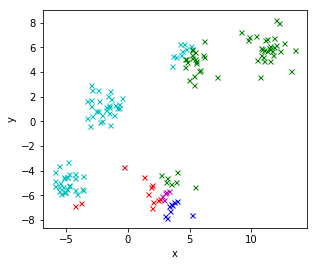

Which kernel function do you want to use? 0 = linear, 1 = quadratic, 2 = rbf, 3 = rad
0
4
Iteration complete.
4
Iteration complete.
4
Iteration complete.
4
Iteration complete.
4
Iteration complete.
Do you want to save the plot for this run?
n


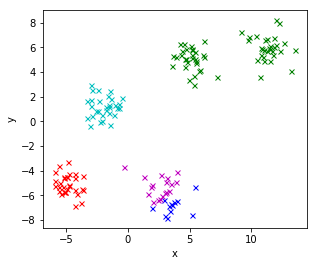

{0: [array([ 3.12746727, -7.83081638]),
  array([ 3.59080387, -6.81681377]),
  array([ 3.95403131, -6.44932598]),
  array([ 3.74224696, -6.53180632]),
  array([ 3.33179917, -6.87992592]),
  array([ 3.43959842, -7.25350726]),
  array([ 1.94726218, -7.04134467]),
  array([ 2.89859037, -6.35683426]),
  array([ 5.46140813, -5.2972056 ]),
  array([ 3.51543137, -6.72839808]),
  array([ 2.99773022, -7.67594451]),
  array([ 5.1726419 , -7.56687231])],
 1: [array([10.86355526,  5.88094581]),
  array([6.12141771, 5.40890054]),
  array([11.04366899,  5.77368576]),
  array([5.31563495, 2.97779878]),
  array([5.84616065, 4.14048406]),
  array([11.24879916,  5.70335885]),
  array([9.76994186, 6.5505375 ]),
  array([11.80186103,  6.0465673 ]),
  array([10.97538304,  5.22483838]),
  array([11.07782113,  6.61838026]),
  array([3.55588619, 4.49553414]),
  array([5.74055645, 4.0462994 ]),
  array([4.62471505, 4.36126959]),
  array([5.35054598, 3.68771659]),
  array([4.69379599, 5.82797464]),
  array([5.1

In [42]:
centers = [(-5, -5), (5, 5),(11,6),(-2,1),(3,-6)]
cluster_std = [0.8, 1,1,0.8,1.2]

X, y = make_blobs(n_samples=150, cluster_std=cluster_std, centers=centers, n_features=2, random_state=1)

# plt.scatter(X[y == 0, 0], X[y == 0, 1], color="red", s=10, label="Cluster1")
# plt.scatter(X[y == 1, 0], X[y == 1, 1], color="blue", s=10, label="Cluster2")
# plt.legend()
# plt.show()

k = 5
KernelizedLloydMethod(k,X)

Which kernel function do you want to use? 0 = linear, 1 = quadratic, 2 = rbf, 3 = rad
2
0
Iteration complete.
Do you want to save the plot for this run?
n


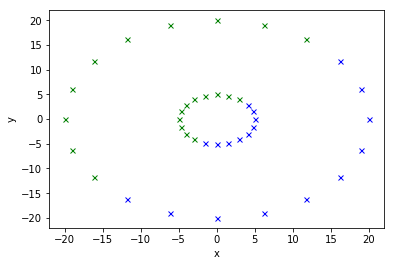

[{0: [array([5., 0.]),
   array([4.75528258, 1.54508497]),
   array([4.04508497, 2.93892626]),
   array([-1.54508497, -4.75528258]),
   array([-9.18485099e-16, -5.00000000e+00]),
   array([ 1.54508497, -4.75528258]),
   array([ 2.93892626, -4.04508497]),
   array([ 4.04508497, -2.93892626]),
   array([ 4.75528258, -1.54508497]),
   array([20.,  0.]),
   array([19.02113033,  6.18033989]),
   array([16.18033989, 11.75570505]),
   array([-11.75570505, -16.18033989]),
   array([ -6.18033989, -19.02113033]),
   array([-3.6739404e-15, -2.0000000e+01]),
   array([  6.18033989, -19.02113033]),
   array([ 11.75570505, -16.18033989]),
   array([ 16.18033989, -11.75570505]),
   array([19.02113033, -6.18033989])],
  1: [array([2.93892626, 4.04508497]),
   array([1.54508497, 4.75528258]),
   array([3.061617e-16, 5.000000e+00]),
   array([-1.54508497,  4.75528258]),
   array([-2.93892626,  4.04508497]),
   array([-4.04508497,  2.93892626]),
   array([-4.75528258,  1.54508497]),
   array([-5.000000e+

In [62]:
X = getCircle(20,5) + getCircle(20,20) #+ getCircle(20,35) + getCircle(20,2)
k = 2
KernelizedLloydMethod(k,X)

Which kernel function do you want to use? 0 = linear, 1 = quadratic, 2 = rbf, 3 = rad
3
2
Iteration complete.
2
Iteration complete.
Do you want to save the plot for this run?
y
How many clusters? (What is k?)
3
What type of object is each cluster? (Circle, quadratic, blob, etc.)
Parabola
What kernel function are you using? (Linear, quadratic, rbf, etc.)
Radius


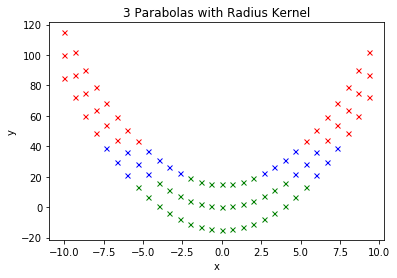

[{0: [array([-6., 36.]),
   array([-5.33333333, 28.44444444]),
   array([-4.66666667, 21.77777778]),
   array([ 4.66666667, 21.77777778]),
   array([ 5.33333333, 28.44444444]),
   array([ 6., 36.]),
   array([-4.66666667, 36.77777778]),
   array([-4., 31.]),
   array([-3.33333333, 26.11111111]),
   array([-2.66666667, 22.11111111]),
   array([ 2.66666667, 22.11111111]),
   array([ 3.33333333, 26.11111111]),
   array([ 4., 31.]),
   array([ 4.66666667, 36.77777778]),
   array([-7.33333333, 38.77777778]),
   array([-6.66666667, 29.44444444]),
   array([-6., 21.]),
   array([ 6., 21.]),
   array([ 6.66666667, 29.44444444]),
   array([ 7.33333333, 38.77777778])],
  1: [array([-4., 16.]),
   array([-3.33333333, 11.11111111]),
   array([-2.66666667,  7.11111111]),
   array([-2.,  4.]),
   array([-1.33333333,  1.77777778]),
   array([-0.66666667,  0.44444444]),
   array([-8.88178420e-15,  7.88860905e-29]),
   array([0.66666667, 0.44444444]),
   array([1.33333333, 1.77777778]),
   array([2., 4

In [70]:
X = X = getQuadratic(30,1,0,0) + getQuadratic(30,1,0,15) + getQuadratic(30,1,0,-15)
#[y*20 for y in getGaussian(30,0,1)] + [y*10 for y in getGaussian(30,0,1)] + [y*2 for y in getGaussian(30,0,1)]
k = 3
KernelizedLloydMethod(k,X)

Which kernel function do you want to use? 0 = linear, 1 = quadratic, 2 = rbf, 3 = rad
3
0
Iteration complete.
Do you want to save the plot for this run?
n


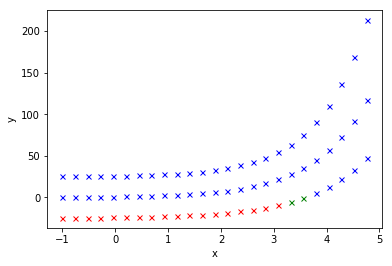

[{0: [array([-1.        ,  0.36787944]),
   array([-0.76      ,  0.46766643]),
   array([-0.52      ,  0.59452055]),
   array([-0.28      ,  0.75578374]),
   array([-0.04      ,  0.96078944]),
   array([0.2       , 1.22140276]),
   array([0.44      , 1.55270722]),
   array([0.68      , 1.97387773]),
   array([0.92      , 2.50929039]),
   array([1.16      , 3.18993328]),
   array([1.4       , 4.05519997]),
   array([1.64      , 5.15516951]),
   array([1.88      , 6.55350486]),
   array([2.12      , 8.33113749]),
   array([ 2.36      , 10.59095145]),
   array([ 2.6       , 13.46373804]),
   array([ 2.84      , 17.11576554]),
   array([ 3.08     , 21.7584024]),
   array([ 3.32      , 27.66035056]),
   array([ 3.56      , 35.16319715]),
   array([ 3.8       , 44.70118449]),
   array([ 4.04      , 56.82634281]),
   array([ 4.28      , 72.24044001]),
   array([ 4.52      , 91.83559798]),
   array([  4.76     , 116.7459259]),
   array([-1.        , 25.33287108]),
   array([-0.76      , 25.433

In [60]:
X = getExp(25,1,1,0) + getExp(25,1,1.1,25) + getExp(25,1,0.9,-25) #+ getExp(20,1,1.3,-25)
k = 3
KernelizedLloydMethod(k,X)

In [74]:
X = getCircle(20,5) + getCircle(20,20)
for i in range(len(X)):
    X[i] = list(X[i])
print(X)
print("")
X = getExp(25,1,1,0) + getExp(25,1,1.1,25) + getExp(25,1,0.9,-25) #+ getExp(20,1,1.3,-25)
for i in range(len(X)):
    X[i] = list(X[i])
print(X)
print("")
X = X = getQuadratic(30,1,0,0) + getQuadratic(30,1,0,15) + getQuadratic(30,1,0,-15)
for i in range(len(X)):
    X[i] = list(X[i])
print(X)
print("")

[[5.0, 0.0], [4.755282581475767, 1.545084971874737], [4.045084971874737, 2.938926261462366], [2.938926261462366, 4.045084971874737], [1.5450849718747373, 4.755282581475767], [3.061616997868383e-16, 5.0], [-1.5450849718747368, 4.755282581475768], [-2.938926261462365, 4.045084971874737], [-4.045084971874736, 2.9389262614623664], [-4.755282581475767, 1.5450849718747375], [-5.0, 6.123233995736766e-16], [-4.755282581475768, -1.5450849718747364], [-4.045084971874737, -2.938926261462365], [-2.9389262614623664, -4.045084971874736], [-1.5450849718747377, -4.755282581475767], [-9.184850993605148e-16, -5.0], [1.5450849718747361, -4.755282581475768], [2.9389262614623646, -4.045084971874738], [4.045084971874736, -2.938926261462367], [4.755282581475767, -1.5450849718747384], [20.0, 0.0], [19.02113032590307, 6.180339887498948], [16.18033988749895, 11.755705045849464], [11.755705045849464, 16.18033988749895], [6.180339887498949, 19.02113032590307], [1.2246467991473533e-15, 20.0], [-6.180339887498947, 